# DLC to DeepOF pipeline
---
---
## Deeplabcut

First we'll obtain the coordinate data from dlc. This notebook is all in one, however, some parts I have run on google colab for faster computing, I will indicate which cells are colab specific and which cells to only run once. I also ran DLC and DeepOF with different kernels.

---
#### Set up
1.	Download anaconda

2.	Install deeplabcut by this code  pip install "deeplabcut[gui]" in your anaconda terminal

3.	Type in conda: conda activate deeplabcut

4.	Type: python -m deeplabcut

5.	Then in deeplabcut, start new project, follow instructions

6.	Import videos, mp4, avi etc

7.	Select: select the directory where your project will be created, copy videos (you can keep them there in the directory)

8.	You can use multi animal if needed

9.	Should say ‘project loaded’ (you can check in the terminal, something like ‘traceback’ is an error)

10.	In ‘manage project’ you need to edit the configuration: 
-	choose the number of individuals (can right click on the individuals to delete or insert, there are 3 by default) 
-	choose the bodyparts to label, there are several conventions, the most detailed ones described on the DeepOF website has 14 points (example on the drawing further below)
-	change the skeleton: add the different connections between bodyparts, for example: tail_1 + tail_2 or spine_1 + spine_2
-	can change the number of frames to be labeled, usually keep 20 by default

11.  Go to ‘extract frames’ choose the video file you want to extract the frames from and press extract frames. A subdirectory called ‘labeled-data’ should appear in the projet folder. (If you struggle to differentiate the mice like I did, find the framerate of the video - 25 in our case, and divide the frames' number by the framerate to get the time at which each frame appears in the video - then you can watch the whole video and say which mouse is which for each frame as they appear in the video)

12.  Go to ‘label frames’ and click label frames then select the folder that contains the frames to label (same name as video file). This will open the Napari software in which you can label the selected frames.

13.	The four buttons on the top left are used to manage the labels :   the second one is to place the label (you can still zoom in and move around by dragging and clicking) the one on the right is to select dots, to move existing ones or to delete some by clicking on the first button
On the bottom left you can select the current label and its corresponding animal (it moves to the next automatically when placing a label) 
Don’t hesitate to skip a label if it is not visible. Save with ctrl+s

This is what the GUI to label frames should look like:

![label frames GUI](dlc_labelframes.png)

To be compatible with DeepOF, label the mice following their deepof_14 set of points (with the same names):

![how to label frames](https://deepof.readthedocs.io/en/latest/_images/deepof_DLC_tagging.png)
 
14.	Go to ‘label-frames’ and click ‘check frames’ and a new subdirectory in the labeled-data file containing the labeled frames
After this step go to step 20 to train network

#### Start colab 

15.	Open this notebook in colab. (IF your computer has a good graphics card you can run this on computer. In windows: Press Win + X to open the Power User menu.
Select "Device Manager" from the list.
In the Device Manager window, expand the "Display adapters" section. You should see the name of your graphics card(s) listed here.)

16.	Go to the pieces of code and run first one by shift+enter > restart run time (choose GPU to run faster)> re execute same piece of code (there will be a green check if it’s executed properly). 

17.	Upload your folder you created all in the start to google drive 

18.	Run the other pieces of code

19.	Piece of code ‘setup your project variables’: ‘project folder name’ > put name of project ; and ‘videotype’ you’re using. 

20.	Create training dataset: you can leave as default but to know what it means: resnet_50 is name of the neural network imgaug to make your training more robust you make the frames a bit more challenging. They recommend 100 000 iterations, this should take several hours.

---
### Training the model

In [ ]:
# Run this cell if using google colab
!apt update && apt install cuda-11-8
!pip install "deeplabcut[tf]"

!pip install --upgrade scikit-image
!pip3 install pickle5

In [ ]:
# Run this cell if using google colab, it loads your google drive (this is where I stored the DLC data)
from google.colab import drive
drive.mount('/content/drive')


If running locally: ou need to use a conda environment with deeplabcut installed.
In steps 1-3 you should already have created your conda environment, use the same one to run this notebook.

In [2]:
# If ran locally, here is the path to where the project is stored
PATH_DRIVE = "G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21"

In [3]:
import deeplabcut
#import pickle5 as pickle


Loading DLC 2.3.9...


---
### Load data

Change paths do data 

Locally:

In [4]:
# PLEASE EDIT THESE PATHS:
ProjectFolderName = 'LGC-2micecage-Max-2024-02-21'
VideoType = 'mp4' #, mp4, MOV, or avi, whatever you uploaded! mp4 is recommended


# No need to edit this, we are going to assume you put videos you want to analyze in the "videos" folder, but if this is NOT true, edit below:
videofile_path = PATH_DRIVE + '/videos/' #where the videos are stored
videofile_path2 = PATH_DRIVE + "/videos2/" # additional videos for more data 

#No need to edit this, as you set it when you passed the ProjectFolderName (above):
path_config_file = PATH_DRIVE  + '/config.yaml'
path_config_file
#This creates a path variable that links to your google drive project

# ATTENTION:
#which shuffle do you want to create and train?
shuffle = 1 #edit if needed; 1 is the default.

From collab:

In [ ]:
ProjectFolderName = 'LGC-2micecage-Max-2024-02-21'
VideoType = 'mp4' #, mp4, MOV, or avi, whatever you uploaded! mp4 is recommended


# No need to edit this, we are going to assume you put videos you want to analyze in the "videos" folder, but if this is NOT true, edit below:
videofile_path = ['/content/drive/MyDrive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos'] #Enter the list of videos or folder to analyze.
videofile_path

#No need to edit this, as you set it when you passed the ProjectFolderName (above):
path_config_file = '/content/drive/MyDrive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/config.yaml'
path_config_file
#This creates a path variable that links to your google drive project

# ATTENTION:
#which shuffle do you want to create and train?
shuffle = 1 #edit if needed; 1 is the default.

---
### Create Multi-Animal training dataset

In [10]:
#if you labeled on Windows, please set the windows2linux=True:
deeplabcut.create_multianimaltraining_dataset(path_config_file, Shuffles=[shuffle], net_type="dlcrnet_ms5",windows2linux=True)

G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\labeled-data\cageG_astromorph\CollectedData_Max.h5  not found (perhaps not annotated).
Utilizing the following graph: [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [9, 10], [9, 11], [9, 12], [9, 13], [10, 11], [10, 12], [10, 13], [11, 12], [11, 13], [12, 13]]
Creating training data for: S

100%|██████████| 209/209 [00:02<00:00, 93.20it/s] 


The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


---
### Train the model

I put displayiters at 100 which means it will display progress every 100 iterations. That way you can follow the progress along.

In [ ]:
#let's also change the display and save_iters just in case Colab takes away the GPU...
#Typically, you want to train to 50,000 - 200K iterations.
#more info and there are more things you can set: https://github.com/DeepLabCut/DeepLabCut/blob/master/docs/functionDetails.md#g-train-the-network

deeplabcut.train_network(path_config_file, shuffle=shuffle, displayiters=100,saveiters=1000, maxiters=75000, allow_growth=True)

#this will run until you stop it (CTRL+C), or hit "STOP" icon, or when it hits the end (default, 50K iterations).
#Whichever you chose, you will see what looks like an error message, but it's not an error - don't worry....

---
### Evaluation

 - First, we evaluate the pose estimation performance.

- This function evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images) and stores the results as .5 and .csv file in a subdirectory under **evaluation-results**

- If the scoremaps do not look accurate, don't proceed to tracklet assembly; please consider (1) adding more data, (2) adding more bodyparts!

- more info: https://deeplabcut.github.io/DeepLabCut/docs/maDLC_UserGuide.html#evaluate-the-trained-network

Here is an example of what you'd aim to see before proceeding:

![alt text](https://images.squarespace-cdn.com/content/v1/57f6d51c9f74566f55ecf271/1590535809087-X655WY9W1MW1MY1I7DHE/ke17ZwdGBToddI8pDm48kBoswZhKnUtAF7-bTXgw67EUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKc5tTP1cnANTUwNNPnYFjIp6XbP9N1GxIgAkxvBVqt0UvLpPHYwvNQTwHg8f_Zu8ZF/evaluation.png?format=1000w)


In [12]:
#let's evaluate first:
deeplabcut.evaluate_network(path_config_file,Shuffles=[shuffle], plotting=True)
#plot a few scoremaps:
deeplabcut.extract_save_all_maps(path_config_file, shuffle=shuffle, Indices=[0])

Running  DLC_dlcrnetms5_LGC-2micecageFeb21shuffle1_20000  with # of trainingiterations: 20000


c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs
Network Evaluation underway...


220it [04:27,  1.21s/it]


Results for 20000 training iterations, training fraction of 95, and shuffle 1:
Train error: 3.84 pixels. Test error: 12.42 pixels.
With pcutoff of 0.6:
Train error: 3.71 pixels. Test error: 11.3 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels; test-only)
individuals
individual1    10.882173
individual2    12.318555
Average Euclidean distance to GT per bodypart (in pixels; test-only)
bodyparts
Center        16.665661
Left_bhip      7.138598
Left_ear       5.378675
Left_fhip      8.405421
Nose           6.593923
Right_bhip    21.202543
Right_ear      6.193765
Right_fhip    10.124506
Spine_1       16.214805
Spine_2       15.320003
Tail_1        12.194497
Tail_2        16.480292
Tail_base      5.578222
Tail_tip      12.469661
Done and results stored for snapshot:  snapshot-20000
Selecting best skeleton...
Graph 1|10


220it [00:00, 466.14it/s]
100%|██████████| 220/220 [00:00<00:00, 1473.49it/s]


Graph 2|10


220it [00:00, 388.93it/s]
100%|██████████| 220/220 [00:00<00:00, 1725.05it/s]


Graph 3|10


220it [00:00, 276.12it/s]
100%|██████████| 220/220 [00:00<00:00, 1835.23it/s]


Graph 4|10


220it [00:00, 273.01it/s]
100%|██████████| 220/220 [00:00<00:00, 1634.90it/s]


Graph 5|10


220it [00:01, 208.27it/s]
100%|██████████| 220/220 [00:00<00:00, 1746.05it/s]


Graph 6|10


220it [00:01, 143.54it/s]
100%|██████████| 220/220 [00:00<00:00, 1664.44it/s]


Graph 7|10


220it [00:01, 163.30it/s]
100%|██████████| 220/220 [00:00<00:00, 1234.70it/s]


Graph 8|10


220it [00:01, 155.42it/s]
100%|██████████| 220/220 [00:00<00:00, 1398.97it/s]


Graph 9|10


220it [00:01, 157.54it/s]
100%|██████████| 220/220 [00:00<00:00, 1799.83it/s]


Graph 10|10


220it [00:01, 129.81it/s]
100%|██████████| 220/220 [00:00<00:00, 1655.17it/s]
c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs
Analyzing data...


1it [00:01,  1.06s/it]


Saving plots...


100%|██████████| 1/1 [02:13<00:00, 133.02s/it]


IF these images, numbers, and maps do not look good, do not proceed. You should increase the diversity and number of frames you label, and re-create a training dataset and re-train!

---
### Start Analyzing videos:

This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in a pickle file in the same directory where the video resides.

In [ ]:
#EDIT OPTION: which video(s) do you want to analyze? You can pass a path or a folder:
# currently, if you run "as is" it assumes you have a video in the DLC project video folder!

deeplabcut.analyze_videos(path_config_file, videofile_path, shuffle=shuffle, videotype=VideoType)

Another checkpoint to see if we need more refinement

In [ ]:
##### Optional: #####
## look at the output video; if the pose estimation (i.e. key points)
## don't look good, don't proceed with tracking - add more data to your training set and re-train!

#EDIT: let's check a specific video (PLEASE EDIT VIDEO PATH):
Specific_videofile = videofile_path + 'Cage G.mp4'

#don't edit:
deeplabcut.create_video_with_all_detections(path_config_file, [Specific_videofile], shuffle=shuffle)

*If* it doesn't that good yet, find outlier frames and relabel them and then retrain.

---

### Adding Data

This step is only for adding additional data after having trained the model (or labelling new videos using a model that has already been trianed).
First, add the videos to the video file, then extract the frames to label. This can be done directly in the GUI or following the code here:

In [8]:
deeplabcut.extract_frames(path_config_file, mode ='automatic', algo='uniform', crop=False)    

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\maxca\Desktop\LGC-2micecage-Max-2024-02-21\videos\Cage A.mp4 ?
Do you want to extract (perhaps additional) frames for video: C:\Users\maxca\Desktop\LGC-2micecage-Max-2024-02-21\videos\cage B.mp4 ?
Do you want to extract (perhaps additional) frames for video: C:\Users\maxca\Desktop\LGC-2micecage-Max-2024-02-21\videos\Cage C.mp4 ?
Do you want to extract (perhaps additional) frames for video: C:\Users\maxca\Desktop\LGC-2micecage-Max-2024-02-21\videos\cage F.mp4 ?
Do you want to extract (perhaps additional) frames for video: C:\Users\maxca\Desktop\LGC-2micecage-Max-2024-02-21\videos\Cage G.mp4 ?
Do you want to extract (perhaps additional) frames for video: G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\videos\cageH_astromorph.mp4 ?
Do you want to extract (perhaps additional) frames for video: G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\v

In [9]:
deeplabcut.label_frames(path_config_file)

In [10]:
deeplabcut.check_labels(path_config_file)

Creating images with labels by Max.


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]

Attention: G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21\labeled-data\cageG_astromorph does not appear to have labeled data!
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


Finally, add the new data to the model before retraining

In [11]:
deeplabcut.merge_datasets(path_config_file)

The following folder was not manually refined,... G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\labeled-data\desktop.ini
Please label, or remove the un-corrected folders.


In [ ]:
deeplabcut.create_multianimaltraining_dataset(path_config_file, Shuffles=[shuffle], net_type="dlcrnet_ms5",windows2linux=True)

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=shuffle, displayiters=100,saveiters=1000, maxiters=10000, allow_growth=True)

To refine the model without adding videos, you can extract outlier frames to relabel:

In [8]:
deeplabcut.extract_outlier_frames(path_config_file, [videofile_path], outlieralgorithm='uncertain')

Analyzing all the videos in the directory...
Method  uncertain  found  17276  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
Frames from video Cage C  already extracted (more will be added)!
Loading video...
Cropping coords: None
Duration of video [s]:  742.04 , recorded @  25.0 fps!
Overall # of frames:  18551 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 742.04  seconds.
Extracting and downsampling... 17275  frames from the video.


17275it [49:57,  5.76it/s]
c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)


c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Let's select frames indices: [11327, 10316, 4726, 2073, 17426, 1383, 11825, 14449, 5753, 9211, 2756, 10494, 6571, 13264, 16973, 3682, 7653, 16818, 12253, 18085]
Attempting to create a symbolic link of the video ...
Video G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\videos\Cage C.mp4 already exists. Skipping...
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\Cage C.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  uncertain  found  15799  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
Frames from video cageH_astromorph  already extracted (more will be added)!
Loading video...
Cropping coords: None
Durati

15798it [51:19,  5.13it/s]


Kmeans clustering ... (this might take a while)


c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Let's select frames indices: [15929, 6469, 12629, 13628, 10570, 13319, 16108, 14912, 11579, 10314, 6369, 9214, 15641, 1411, 136, 14636, 11682, 3371, 9036, 3060]
Attempting to create a symbolic link of the video ...
Video G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\videos\cageH_astromorph.mp4 already exists. Skipping...
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\cageH_astromorph.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  uncertain  found  14808  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
Frames from video Cage G  already extracted (more will be added)!
Loading video...
Cropping coords: N

14807it [45:00,  5.48it/s]


Kmeans clustering ... (this might take a while)


c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Let's select frames indices: [10755, 12795, 15448, 7006, 5479, 12343, 1456, 13741, 5676, 15550, 126, 4542, 9486, 11100, 4833, 4040, 4561, 8322, 14495, 875]
Attempting to create a symbolic link of the video ...
Video G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\videos\Cage G.mp4 already exists. Skipping...
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\Cage G.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  uncertain  found  15482  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
Frames from video cageK_astromorph  already extracted (more will be added)!
Loading video...
Cropping coords: None
Duration of

15482it [38:27,  6.71it/s]


Kmeans clustering ... (this might take a while)


c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\maxca\anaconda3\envs\DEEPLABCUT\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Let's select frames indices: [15974, 783, 7593, 13296, 1592, 4653, 457, 7544, 16471, 9582, 13957, 11487, 11356, 12146, 2193, 8465, 10268, 5797, 7900, 12109]
Attempting to create a symbolic link of the video ...
Video G:\My Drive\EPFL\Master 2\Lab Carmen Sandi\LGC-2micecage-Max-2024-02-21\videos\cageK_astromorph.mp4 already exists. Skipping...
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\cageK_astromorph.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  uncertain  found  14893  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
Nothing extracted, please change the parameters and start again...
Method  uncertain  found  13640  putat

In [6]:
deeplabcut.refine_labels(path_config_file)

After refining or adding more data to the model, reconduct the analysis before assembling the final videos

---

### Assembling animals

In [ ]:
#Check and edit:

numAnimals = 2 #how many animals do you expect to find?
tracktype= 'ellipse' #box, skeleton, ellipse:
#-- ellipse is recommended, unless you have a single-point ma project, then use BOX!

#Optional:
#if you tracked a point that is not useful for assembly,
#like a tail tip that is far from the body, consider dropping it for this step (it's still used later)!
#To drop it, uncomment the next line and add your parts(s):

#bodypart= 'Tail_tip'
#add the parameter ignore_bodyparts=[bodypart]

deeplabcut.convert_detections2tracklets(path_config_file, videofile_path, videotype=VideoType, shuffle=shuffle, overwrite=True)

#OR don't drop, just click RUN:
#deeplabcut.convert_detections2tracklets(path_config_file, videofile_path, videotype=VideoType,
#                                        shuffle=shuffle, overwrite=True)

deeplabcut.stitch_tracklets(path_config_file, videofile_path, shuffle=shuffle, track_method=tracktype, n_tracks=numAnimals)

Filter the data

In [ ]:
deeplabcut.filterpredictions(path_config_file,
                                 videofile_path,
                                 shuffle=shuffle,
                                 videotype=VideoType,
                                 track_method = tracktype)

Plot and assemble the video

In [ ]:
deeplabcut.plot_trajectories(path_config_file, videofile_path, videotype=VideoType, shuffle=shuffle, track_method=tracktype)

In [4]:
deeplabcut.create_labeled_video(path_config_file,
                                videofile_path,
                                shuffle=shuffle,
                                color_by="individual",
                                videotype=VideoType,
                                save_frames=False,
                                filtered=True)

Analyzing all the videos in the directory...
Starting to process video: G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/Cage A.mp4
Loading G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/Cage A.mp4 and data.
Labeled video already created. Skipping...
Starting to process video: G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/cageA_astromorph.mp4
Loading G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/cageA_astromorph.mp4 and data.
Labeled video already created. Skipping...
Starting to process video: G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/cageH_astromorph.mp4
Loading G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/cageH_astromorph.mp4 and data.
Labeled video already created. Skipping...
Starting to process video: G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/LGC-2micecage-Max-2024-02-21/videos/Cage 

[None, None, None, None, None, None, None, None, None, None, None]

---
## DeepOF
Here is the general pipeline of DeepOF - supervised annotation annotates the data using apredetermined set of actions the mice can do. Unsupervised annotation finds any new patterns from the coordinate data.


![DeepOF general pipeline](https://deepof.readthedocs.io/en/latest/_images/deepof_pipelines.png)



In [1]:
import pandas as pd
import os
import deepof
import seaborn as sns
import pickle

import matplotlib.pyplot as plt
from networkx import Graph, draw
import deepof.visuals

In [2]:
import deepof.data

---

### Create a project 

This first part has to be done locally, once done locally the rest can be run on google collab for faster runtime

Modify the paths below to the files containing the tables and videos obtained from DLC

In [3]:
PATH_VIDEOS = "C:/Users/maxca/Documents/EPFL/lab_carmen/Videos"
PATH_TABLES = "C:/Users/maxca/Documents/EPFL/lab_carmen/Tables"
PROJECT_PATH = "G:/My Drive/EPFL/Master 2/Lab Carmen Sandi/deepof"


Only run these cells once to create the project (uncomment when running for the first time)

In [44]:
deepof_mice = deepof.data.Project(
   project_path=".", # Path where to create project files
   video_path=PATH_VIDEOS, # Path to DLC tracked videos
   table_path=PATH_TABLES, # Path to DLC output
   project_name="deepof_mice3", # Name of the current project
   #exp_conditions={exp_ID: exp_condition} # Dictionary containing one or more experimental conditions per provided video
   bodypart_graph="deepof_14", # Labelling scheme to use. See the last tutorial for details
   arena = "polygonal-autodetect", # Computes arena limits, can also do it manually with polygonal-manual
   video_scale = 391
)

By default this method will ask you to label the arena once (polygonal_automatic) 

In [45]:
deepof_mice = deepof_mice.create(verbose=True, force=True) # Create the project 

Setting up project directories...
Loading trajectories...
Smoothing trajectories...
Interpolating outliers...
Iterative imputation of ocluded bodyparts...
Detecting arena...


All-NaN slice encountered


Computing distances...
Computing angles...


invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in arccos
invalid value encountered in

Computing areas...
Done!


Run the following cell in case you want to redo the arena (look in the arena folder of the project)

In [46]:
# ['Cage G', 'cage B', 'Cage C', 'cage F','Cage G', 'cageA_astromorph', 'cageF_astromorph', 'cageH_astromorph', 'cageI_astromorph', 'cageJ_astromorph', 'cageK_astromorph']

deepof_mice.edit_arenas(
    videos = ['cageA_astromorph', 'cageF_astromorph', 'cageJ_astromorph', 'cage F', 'cage B'],
    arena_type = "polygonal-autodetect"
)


Editing 5 arenas


All-NaN slice encountered


Done!


---

### Motion tracking 

Once you've created the project you just need to load it, no need to recreate it everytime. With the project already created and the arena computed, the following cells can be run on google collab

In [4]:
deepof_mice = deepof.data.load_project("./deepof_mice3")

Test with get coords (can also get_angles, get_areas and get_distances)

In [ ]:
deepof_mice.get_coords(polar=False, center="Center", align="Spine_1")['Cage A']#.to_csv('coordsA.csv')


individual1_Spine_1            individual1_Center       \
                                     x          y                  x    y   
00:00:00                           0.0  35.254606                0.0  0.0   
00:00:00.039979332                 0.0  35.896797                0.0  0.0   
00:00:00.079958664                 0.0  36.510453                0.0  0.0   
00:00:00.119937996                 0.0  36.510456                0.0  0.0   
00:00:00.159917328                 0.0  41.559382                0.0  0.0   
...                                ...        ...                ...  ...   
00:10:18.800103339                 0.0  46.871855                0.0  0.0   
00:10:18.840082671                 0.0  46.897701                0.0  0.0   
00:10:18.880062003                 0.0  47.383635                0.0  0.0   
00:10:18.920041335                 0.0  47.383635                0.0  0.0   
00:10:18.960020667                 0.0  47.383635                0.0  0.0   

                   individual1_Left_bhip             individual1_Left_ear  \
                                       x           y                    x   
00:00:00                     -176.630048 -395.229028            13.735627   
00:00:00.039979332           -176.871927 -395.151178            13.554224   
00:00:00.079958664           -168.231241 -399.014159            11.031778   
00:00:00.119937996           -168.232697 -399.015189            10.216553   
00:00:00.159917328           -204.615607 -381.759840            24.667194   
...                                  ...         ...                  ...   
00:10:18.800103339             88.222887    8.020970            29.372500   
00:10:18.840082671             88.183381    8.066528            27.332333   
00:10:18.880062003             88.672255    9.557242            26.895322   
00:10:18.920041335             88.672255    9.557242            26.895322   
00:10:18.960020667             88.672255    9.557242            26.895322   

                               individual1_Left_fhip              ...  \
                             y                     x           y  ...   
00:00:00            106.380721           -160.639262 -390.721418  ...   
00:00:00.039979332  107.250335           -160.880275 -390.653755  ...   
00:00:00.079958664  107.834374           -152.343154 -394.170152  ...   
00:00:00.119937996  109.448178           -152.346203 -394.172569  ...   
00:00:00.159917328  112.573608           -188.350122 -378.412952  ...   
...                        ...                   ...         ...  ...   
00:10:18.800103339   86.398518             51.760192   71.807707  ...   
00:10:18.840082671   88.633210             51.742474   71.898849  ...   
00:10:18.880062003   89.480773             51.617727   72.829777  ...   
00:10:18.920041335   89.480773             51.617727   72.829777  ...   
00:10:18.960020667   89.480773             51.617727   72.829777  ...   

                   individual2_Spine_2            individual2_Tail_1  \
                                     x          y                  x   
00:00:00                     -7.206860 -45.975120         -89.488752   
00:00:00.039979332           10.225266 -44.448199         -65.376062   
00:00:00.079958664            1.100174 -51.883859         -72.816074   
00:00:00.119937996           -0.889027 -60.885515         -48.257196   
00:00:00.159917328           -2.953842 -56.906369         -32.381587   
...                                ...        ...                ...   
00:10:18.800103339          -14.914937 -50.094928        -129.366576   
00:10:18.840082671          -15.023036 -50.059527        -129.616461   
00:10:18.880062003          -14.679339 -50.182728        -128.754819   
00:10:18.920041335          -14.679339 -50.182728        -128.754819   
00:10:18.960020667          -14.679339 -50.182728        -128.754819   

                               individual2_Tail_2              \
                             y                  x           y  

Write the conditions of these experiments into a csv file

(uncomment last line when running for the first time, add experimental conditions if needed)

In [3]:
# Create a dataframe with the experiment id and the conditions
columns = ['experiment_id','condition']
exp_conditions = pd.DataFrame(columns=columns)
exp_conditions['experiment_id'] = ['Cage A', 'cage B', 'Cage C', 'cage F','Cage G', 'cageA_astromorph', 
              'cageF_astromorph', 'cageH_astromorph', 'cageI_astromorph', 'cageJ_astromorph', 'cageK_astromorph', 'cageD_astromorph']
exp_conditions['condition'] = ['', '', '', '','', '', '', '', '', '', '', ''] # To be filled with the conditions

print(exp_conditions)

exp_conditions.to_csv('exp_conditions.csv',index=True)

       experiment_id condition
0             Cage A          
1             cage B          
2             Cage C          
3             cage F          
4             Cage G          
5   cageA_astromorph          
6   cageF_astromorph          
7   cageH_astromorph          
8   cageI_astromorph          
9   cageJ_astromorph          
10  cageK_astromorph          
11  cageD_astromorph          


load this table to project

In [51]:
deepof_mice.load_exp_conditions('exp_conditions.csv')
print(deepof_mice.get_exp_conditions)

{'Cage A':   condition
0       NaN, 'cage B':   condition
1       NaN, 'Cage C':   condition
2       NaN, 'cage F':   condition
3       NaN, 'Cage G':   condition
4       NaN, 'cageA_astromorph':   condition
5       NaN, 'cageF_astromorph':   condition
6       NaN, 'cageH_astromorph':   condition
7       NaN, 'cageI_astromorph':   condition
8       NaN, 'cageJ_astromorph':   condition
9       NaN, 'cageK_astromorph':    condition
10       NaN}


In [ ]:
coords = deepof_mice.get_coords(polar=False, center="Center", align="Spine_1")
coords.filter_id("individual1") # this gives the coordinates of the first individual in the project, supposedly the dominant one


{'Cage A':                    individual1_Spine_1            individual1_Center       \
                                      x          y                  x    y   
 00:00:00                           0.0  35.254606                0.0  0.0   
 00:00:00.039979332                 0.0  35.896797                0.0  0.0   
 00:00:00.079958664                 0.0  36.510453                0.0  0.0   
 00:00:00.119937996                 0.0  36.510456                0.0  0.0   
 00:00:00.159917328                 0.0  41.559382                0.0  0.0   
 ...                                ...        ...                ...  ...   
 00:10:18.800103339                 0.0  46.871855                0.0  0.0   
 00:10:18.840082671                 0.0  46.897701                0.0  0.0   
 00:10:18.880062003                 0.0  47.383635                0.0  0.0   
 00:10:18.920041335                 0.0  47.383635                0.0  0.0   
 00:10:18.960020667                 0.0  47.383635    

---
### Look at how DeepOF sees your mice

In [32]:
from IPython import display

video = deepof.visuals.animate_skeleton(
    deepof_mice,
    experiment_id="Cage A",
    frame_limit=500,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

In [32]:

video = deepof.visuals.animate_skeleton(
    deepof_mice,
    experiment_id="Cage A",
    frame_limit=500,
    dpi=60,
)

html = display.HTML(video)
display.display(html)
plt.close()

---
### Annotations 

Only run this the first time, it' will save the data to a pickle file that you can reload with the next cell.

In [ ]:
# Run the supervised model
supervised = deepof_mice.supervised_annotation()

# Save the annotation results
#with open('supervised_annotation_result3.pkl', 'wb') as f:
#    pickle.dump(supervised, f)

#### Reload data if its not your first time running this instead of recomputing

In [41]:
with open('supervised_annotation_result3.pkl', 'rb') as f:
    supervised = pickle.load(f)

Observe the coordinates dataframe for cages A and C

In [6]:
supervised['Cage A']
supervised['Cage C']

,individual1_individual2_nose2nose,individual1_individual2_sidebyside,individual1_individual2_sidereside,individual1_individual2_nose2tail,individual2_individual1_nose2tail,individual1_individual2_nose2body,individual2_individual1_nose2body,individual1_individual2_following,individual2_individual1_following,individual1_climbing,...,individual1_huddle,individual1_lookaround,individual1_speed,individual2_climbing,individual2_sniffing,individual2_huddle,individual2_lookaround,individual2_speed,individual1_missing,individual2_missing
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.039997843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.079995687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.119993531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.159991375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.835,0.0,0.0,0.0,0.0,14.725,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:12:21.800010781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.369,0.0,0.0,1.0,0.0,1.632,0,0
00:12:21.840008624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.190,0.0,0.0,1.0,0.0,2.447,0,0
00:12:21.880006468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.202,0.0,1.0,1.0,1.0,1.544,0,0
00:12:21.920004312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.195,0.0,1.0,1.0,1.0,0.911,0,0


---
### Visualisation

Charts of the annotations 

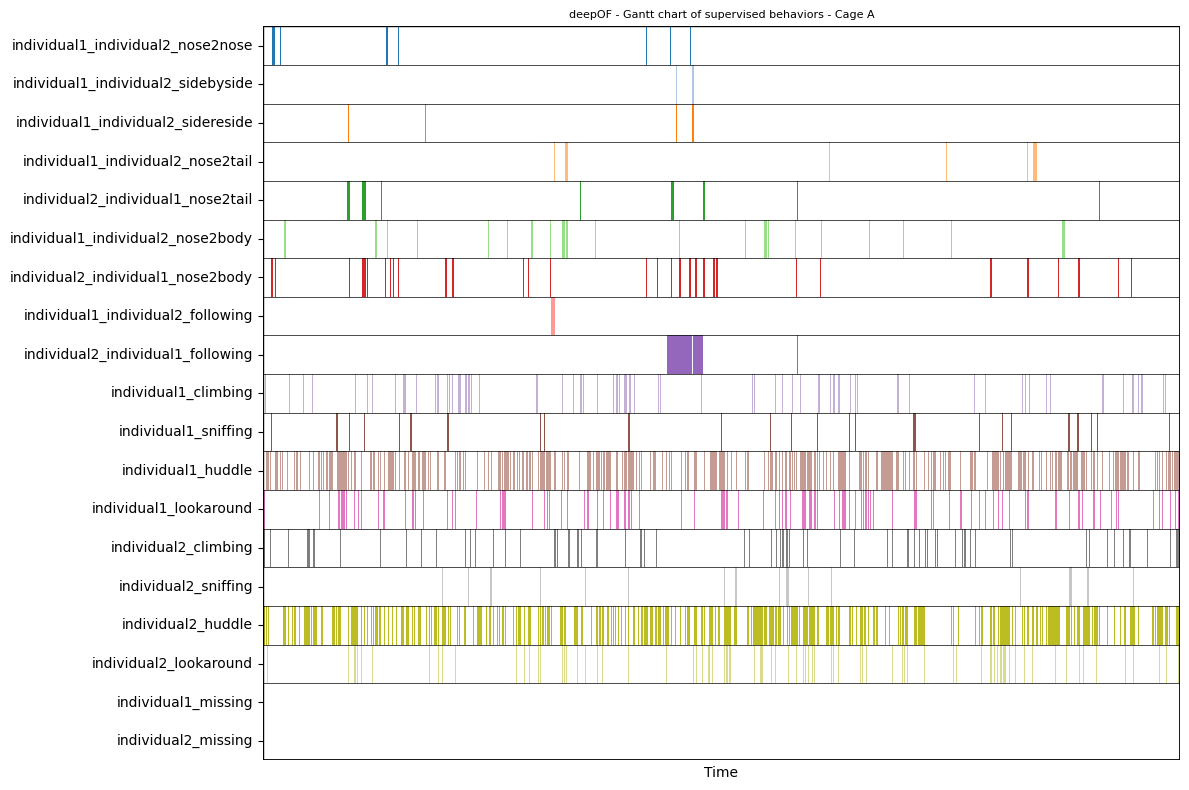

In [23]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    deepof_mice,
    'Cage A',
    supervised_annotations=supervised,
)

plt.show()

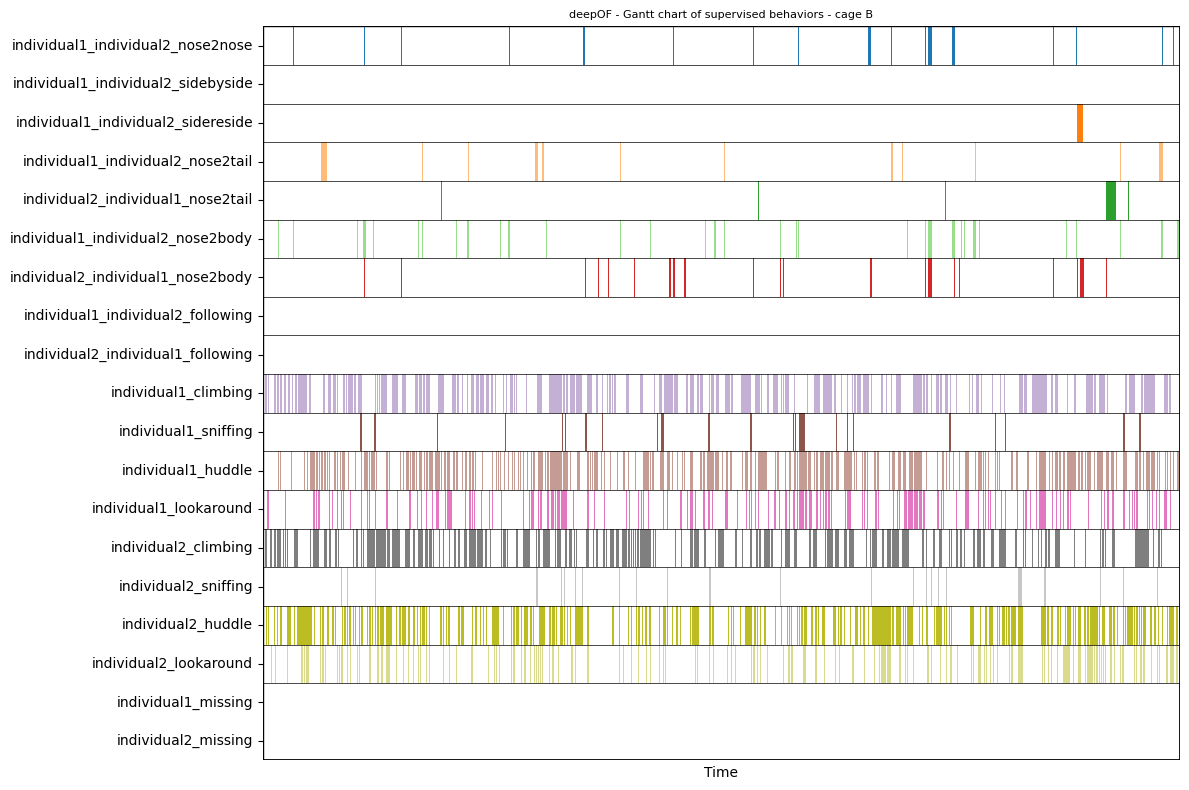

In [24]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    deepof_mice,
    'cage B',
    supervised_annotations=supervised,
)

plt.show()

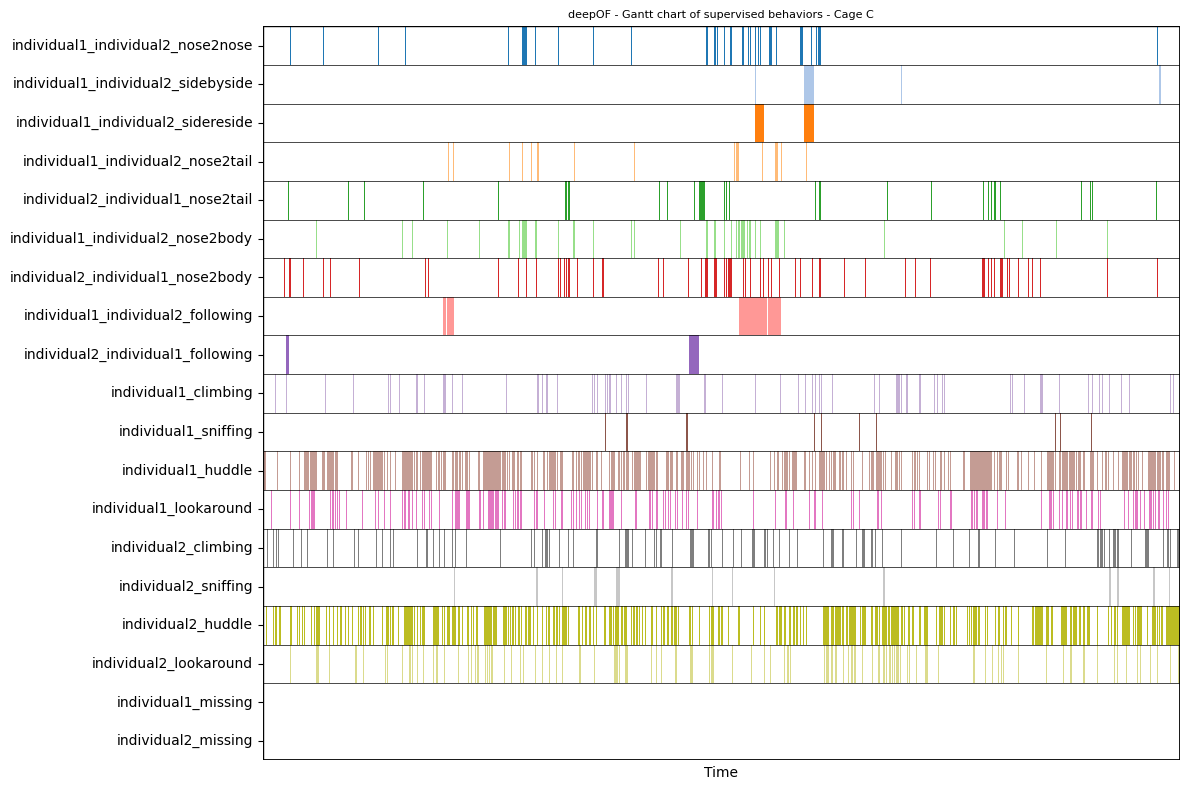

In [25]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    deepof_mice,
    'Cage C',
    supervised_annotations=supervised,
)

plt.show()

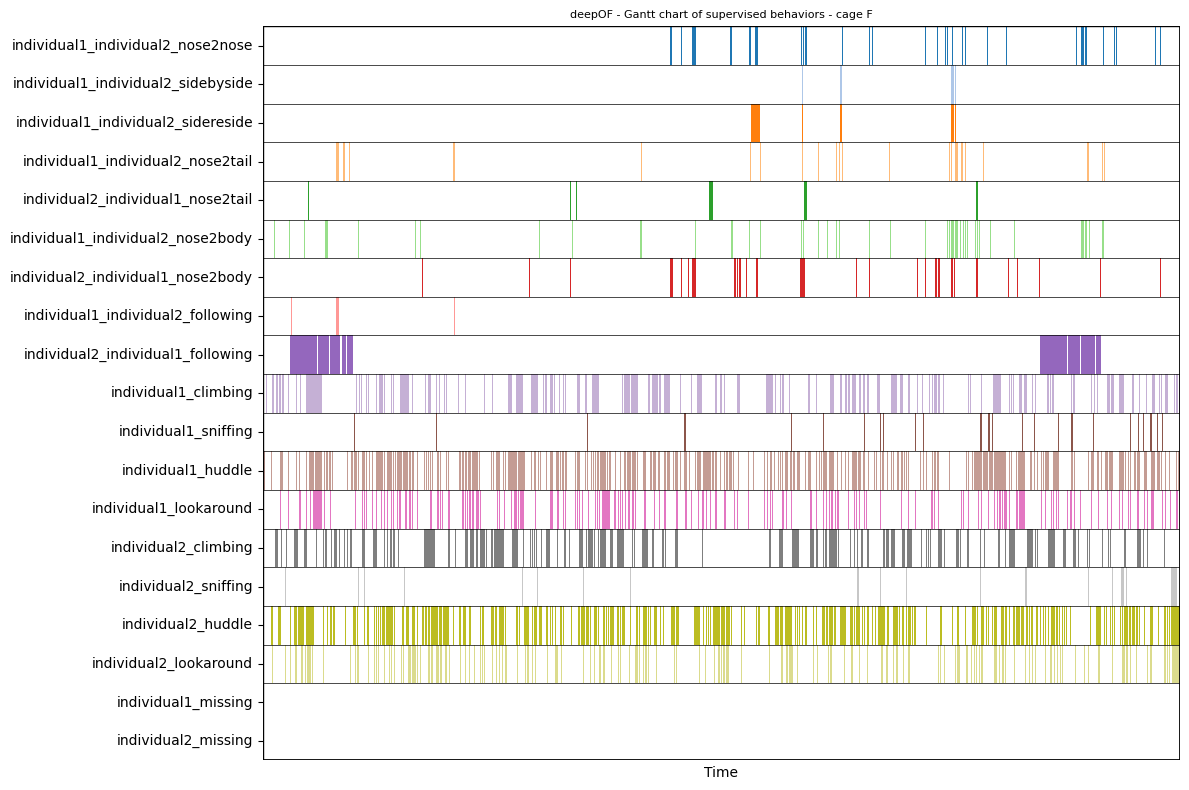

In [26]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    deepof_mice,
    'cage F',
    supervised_annotations=supervised,
)

plt.show()

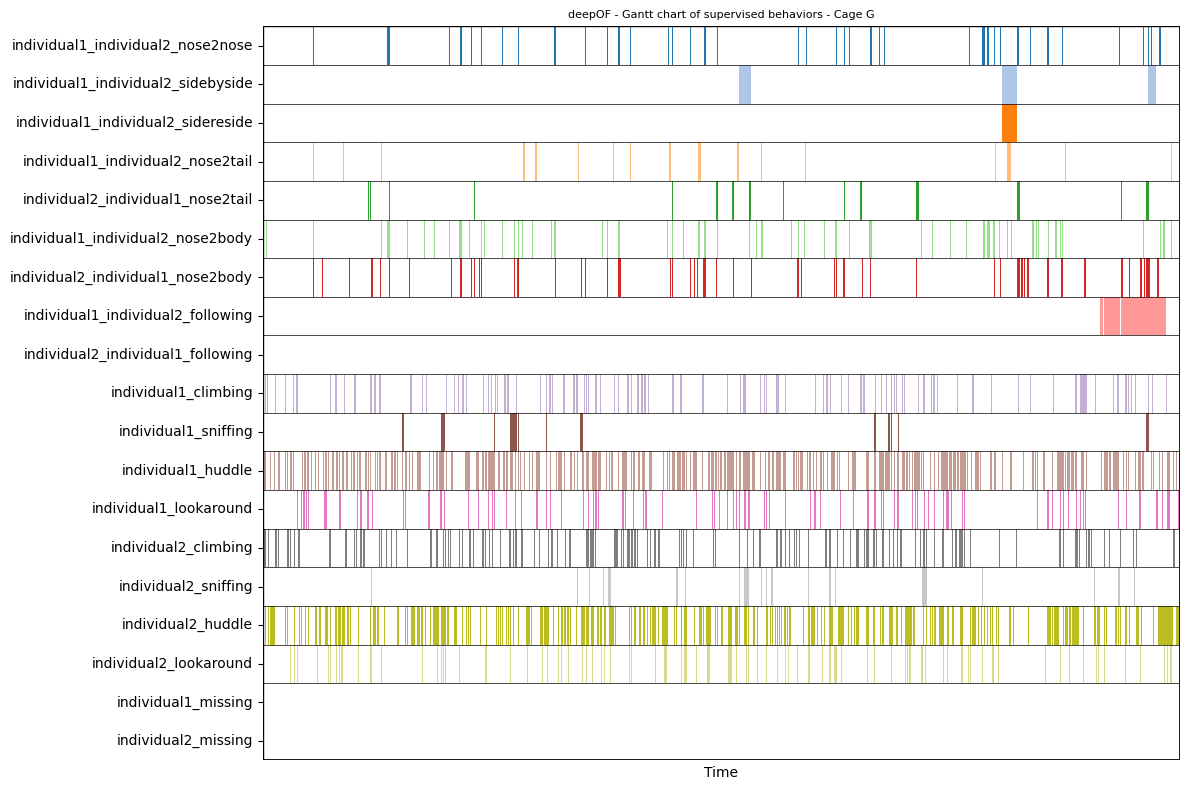

In [27]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    deepof_mice,
    'Cage G',
    supervised_annotations=supervised,
)

plt.show()

In [11]:
supervised['cage B']

,individual1_individual2_nose2nose,individual1_individual2_sidebyside,individual1_individual2_sidereside,individual1_individual2_nose2tail,individual2_individual1_nose2tail,individual1_individual2_nose2body,individual2_individual1_nose2body,individual1_individual2_following,individual2_individual1_following,individual1_climbing,...,individual1_huddle,individual1_lookaround,individual1_speed,individual2_climbing,individual2_sniffing,individual2_huddle,individual2_lookaround,individual2_speed,individual1_missing,individual2_missing
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,1.0,0.0,1.0,0.0,0.000,0,0
00:00:00.039969205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,1.0,0.0,1.0,0.0,0.000,0,0
00:00:00.079938410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,1.0,0.0,1.0,0.0,0.000,0,0
00:00:00.119907615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,1.0,0.0,1.0,0.0,0.000,0,0
00:00:00.159876820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.265,1.0,0.0,1.0,0.0,2.207,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:10:22.800153974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.477,0.0,0.0,0.0,0.0,6.331,0,0
00:10:22.840123179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.688,0.0,0.0,0.0,0.0,5.817,0,0
00:10:22.880092384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.688,0.0,0.0,0.0,0.0,4.112,0,0
00:10:22.920061589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.574,0.0,0.0,0.0,0.0,2.536,0,0


Now comparing the two conditions (dominant/submissive)

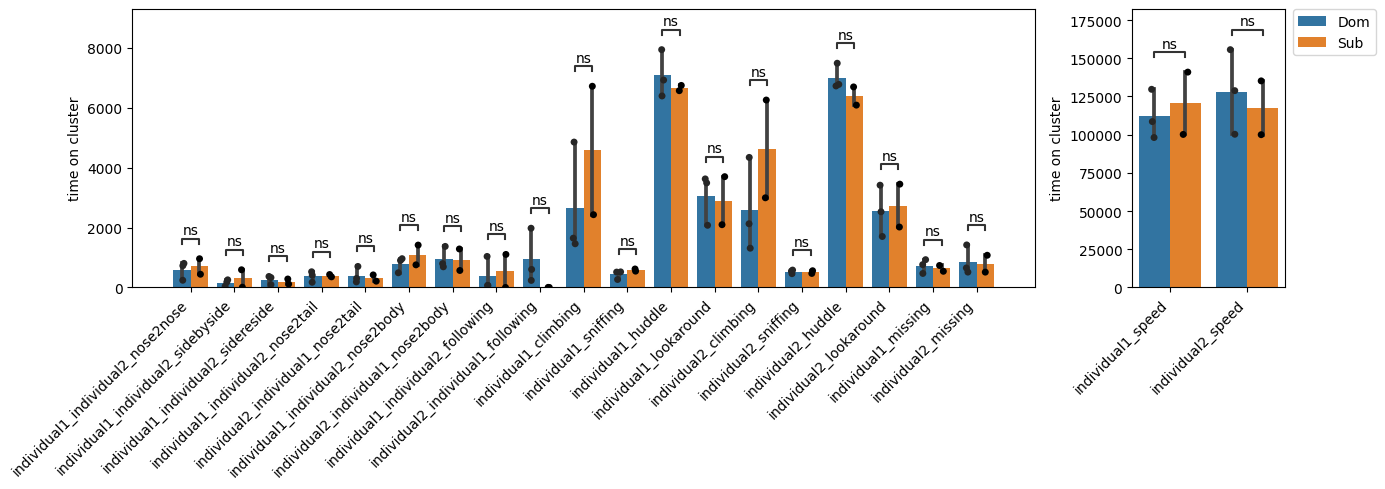

In [28]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    deepof_mice,
    supervised_annotations=supervised,
    add_stats="Mann-Whitney",
    plot_proportions=True,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    deepof_mice,
    supervised_annotations=supervised,
    add_stats="Mann-Whitney",
    plot_proportions=False,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")

fig["A"].get_legend().remove()

plt.tight_layout()
plt.show()

---
### Unsupervised

The size of the window refers to the number of data points in each segment, and the stride is the number of data points by which the window moves forward in each step. By adjusting the window size and stride, different patterns and trends can be extracted from the time series. For example, a smaller window size with a larger stride can capture short-term changes in the data, while a larger window size with a smaller stride can reveal longer-term trends.

#### Preprocessing

In [10]:
preprocessed_coords, global_scaler = coords.preprocess(
    window_size=25, # Sliding window length
    window_step=1, # Sliding window stride
    test_videos=1, # Number of videos in the validation set
    scale="standard", # Scaling method
)

Returns 4 datasets: x (features) and y (labels) for training and validation sets. Also a global scaler

In [11]:
print("Features in the training set have shape {}".format(preprocessed_coords[0].shape))
print("Features in the validation set have shape {}".format(preprocessed_coords[2].shape))

Features in the training set have shape (65320, 25, 56)
Features in the validation set have shape (15901, 25, 56)


This following cell will preprocess the data further

In [24]:
graph_preprocessed_coords, adj_matrix, to_preprocess, global_scaler = deepof_mice.get_graph_dataset(
    # animal_id="individual1", # Comment out for multi-animal embeddings
    center="Center",
    align="Spine_1",
    window_size=25,
    window_step=1,
    test_videos=1,
    preprocess=True,
    scale="standard",
)

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [71]:
print(adj_matrix)

[[0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 

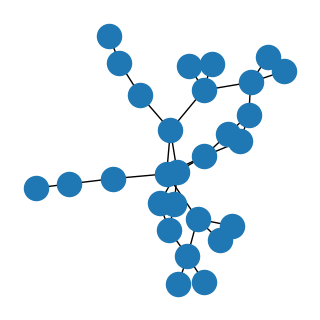

In [13]:
plt.figure(figsize=(3, 3))
draw(Graph(adj_matrix))
plt.show()

#### Training of the model

In [14]:

trained_model = deepof_mice.deep_unsupervised_embedding(
    preprocessed_object=graph_preprocessed_coords, # Change to preprocessed_coords to use non-graph embeddings
    adjacency_matrix=adj_matrix,
    embedding_model="VaDE", # Can also be set to 'VQVAE' and 'Contrastive'
    epochs=10,
    encoder_type="recurrent", # Can also be set to 'TCN' and 'transformer'
    n_components=10,
    latent_dim=4,
    batch_size=1024,
    verbose=False, # Set to True to follow the training loop
    interaction_regularization=0.5, # 0 - only look at individual actions, 1 - only look at interactions
    pretrained=False, # Set to False to train a new model!
)

The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.


In [19]:
type(trained_model)

deepof.models.VaDE

Get the embeddings table from this trained model

In [25]:
embeddings, soft_counts, breaks = deepof.model_utils.embedding_per_video(
    coordinates=deepof_mice,
    to_preprocess=to_preprocess,
    model=trained_model,
    #animal_id="B",
    global_scaler=global_scaler,
)

100%|██████████| 5/5 [05:54<00:00, 70.98s/it]


In [29]:
type(deepof_mice)

deepof.data.Coordinates

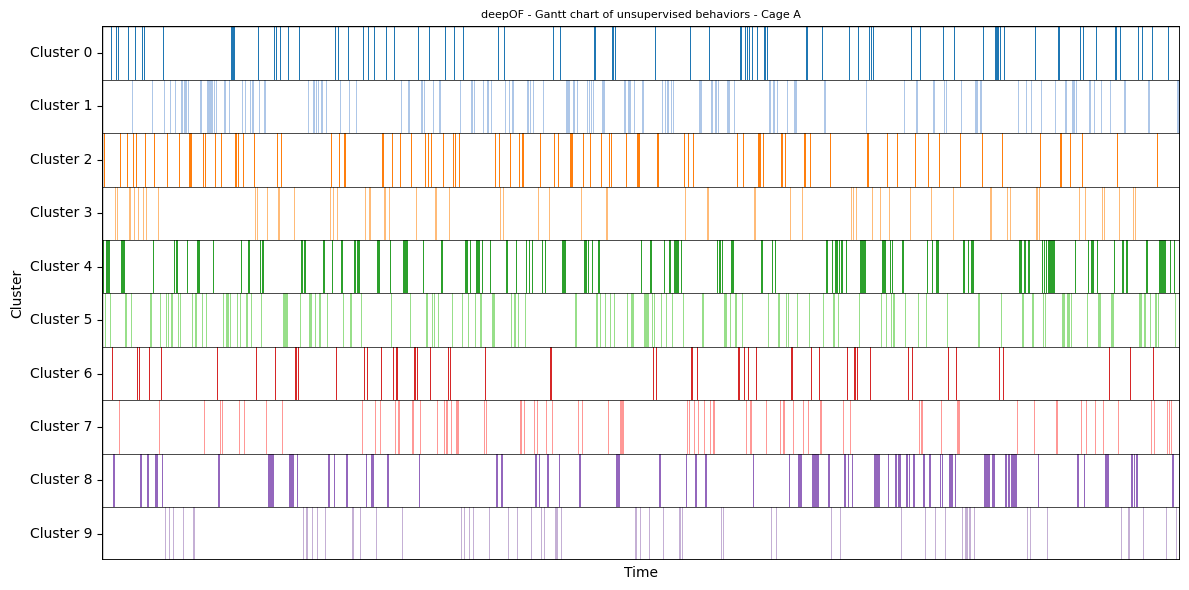

In [32]:
fig = plt.figure(figsize=(12, 6))

deepof.visuals.plot_gantt(
    deepof_mice,
    soft_counts=soft_counts,
    experiment_id="Cage A",
)

AttributeError: 'NoneType' object has no attribute '_exp_conditions'

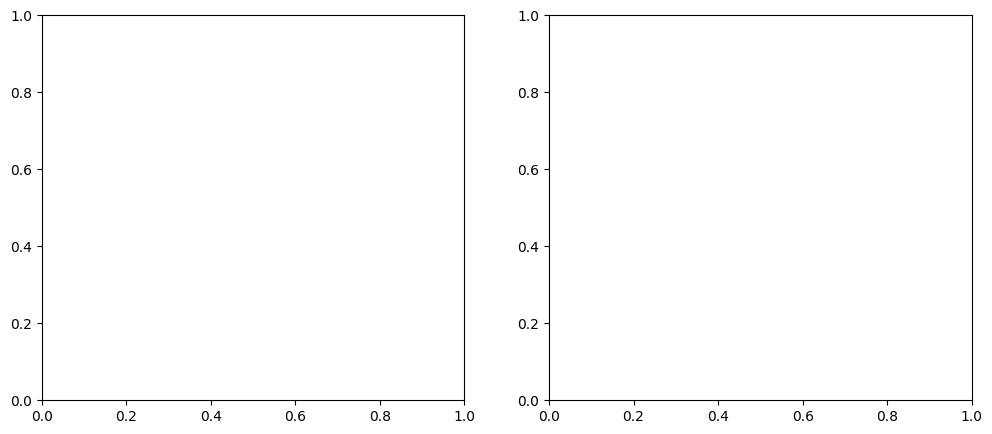

In [28]:
deepof_mice.load_exp_conditions('exp_conditions.csv')



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

deepof.visuals.plot_embeddings(
    deepof_mice,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments=False,
    samples=100,
    ax=ax1,
    save=False, # Set to True, or give a custom name, to save the plot
)

deepof.visuals.plot_embeddings(
    deepof_mice,
    embeddings,
    soft_counts,
    breaks,
    aggregate_experiments="time on cluster", # Can also be set to 'mean' and 'median'
    exp_condition="CSDS",
    show_aggregated_density=False,
    ax=ax2,
    save=False, # Set to True, or give a custom name, to save the plot,
)
ax2.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0
)

plt.tight_layout()
plt.show()